<a href="https://colab.research.google.com/github/sumitrB/DataMining/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
### Exploring and learning to clean dataset

Part A: Pre Processing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Extract File from drive
file = '/content/drive/MyDrive/DataMining/Asgn2/Results_2017-18.csv'

# Read the dataset
df = pd.read_csv(file)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   117 non-null    object 
 1   Entering Grade Level        117 non-null    object 
 2   District                    101 non-null    float64
 3   Birth Month                 117 non-null    object 
 4   OLSAT Verbal Score          117 non-null    object 
 5   OLSAT Verbal Percentile     117 non-null    object 
 6   NNAT Non Verbal Raw Score   117 non-null    object 
 7   NNAT Non Verbal Percentile  117 non-null    int64  
 8   Overall Score               117 non-null    int64  
 9   School Preferences          75 non-null     object 
 10  School Assigned             28 non-null     object 
 11  Will you enroll there?      71 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.1+ KB


In [4]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [5]:
df.shape

(117, 12)

In [6]:
# Columns in the Dataset
df.columns

Index(['Timestamp', 'Entering Grade Level', 'District', 'Birth Month',
       'OLSAT Verbal Score', 'OLSAT Verbal Percentile',
       'NNAT Non Verbal Raw Score', 'NNAT Non Verbal Percentile',
       'Overall Score', 'School Preferences', 'School Assigned',
       'Will you enroll there?'],
      dtype='object')

In [7]:
# Rename columns
df.rename(columns={
    "Entering Grade Level": "Grade Level",
    "Will you enroll there?": "Enrollment Decision"
}, inplace=True)

# Print the updated column names to verify
print("Updated column names:", df.columns)

Updated column names: Index(['Timestamp', 'Grade Level', 'District', 'Birth Month',
       'OLSAT Verbal Score', 'OLSAT Verbal Percentile',
       'NNAT Non Verbal Raw Score', 'NNAT Non Verbal Percentile',
       'Overall Score', 'School Preferences', 'School Assigned',
       'Enrollment Decision'],
      dtype='object')


In [8]:
# Check for missing values in each column
missing_data = df.isnull().sum()
# Print missing data count per column
print("Missing values in each column:\n", missing_data[missing_data>0])

Missing values in each column:
 District               16
School Preferences     42
School Assigned        89
Enrollment Decision    46
dtype: int64


In [9]:
# Since Columns School Preferences, School Assigned, and Enrollment Decision consist of nearly half the missing values
# Drop them
df.drop(columns=["School Preferences", "School Assigned", "Enrollment Decision"], inplace=True)

In [10]:
# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# Convert numerical columns to proper numeric types
# This would also remove any kind of entry that is not numeric
numeric_columns = ["OLSAT Verbal Score", "OLSAT Verbal Percentile", "NNAT Non Verbal Raw Score"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
# Identify incorrect values based on correct score ranges
invalid_values_corrected = df[(df["OLSAT Verbal Score"] < 0) | (df["OLSAT Verbal Score"] > 30) |
                              (df["OLSAT Verbal Percentile"] < 0) | (df["OLSAT Verbal Percentile"] > 100) |
                              (df["NNAT Non Verbal Raw Score"] < 0) | (df["NNAT Non Verbal Raw Score"] > 48) |
                              (df["NNAT Non Verbal Percentile"] < 0) | (df["NNAT Non Verbal Percentile"] > 100) |
                              (df["Overall Score"] < 0) | (df["Overall Score"] > 100)]

# Display incorrect entries
print("Incorrect Score Entries:\n", invalid_values_corrected)

Incorrect Score Entries:
               Timestamp Grade Level  District Birth Month  OLSAT Verbal Score  \
31  2017-04-10 08:30:29           K      11.0       March                32.0   
68  2017-04-26 10:26:30           K       2.0   September                99.0   
72  2017-04-26 23:34:58           3      30.0     October                90.0   
81  2017-05-05 21:41:31           K      28.0         May                35.0   
98  2017-06-01 18:06:00           K       2.0        July                83.0   
111 2017-06-07 23:25:27           K       2.0    December                99.0   
113 2017-06-21 22:52:59           K      20.0        July                97.0   

     OLSAT Verbal Percentile  NNAT Non Verbal Raw Score  \
31                      97.0                       40.0   
68                      99.0                       99.0   
72                      90.0                       90.0   
81                      94.0                       40.0   
98                      83.0  

In [12]:
# Drop rows form table with incorrect scores
df = df.drop(invalid_values_corrected.index)

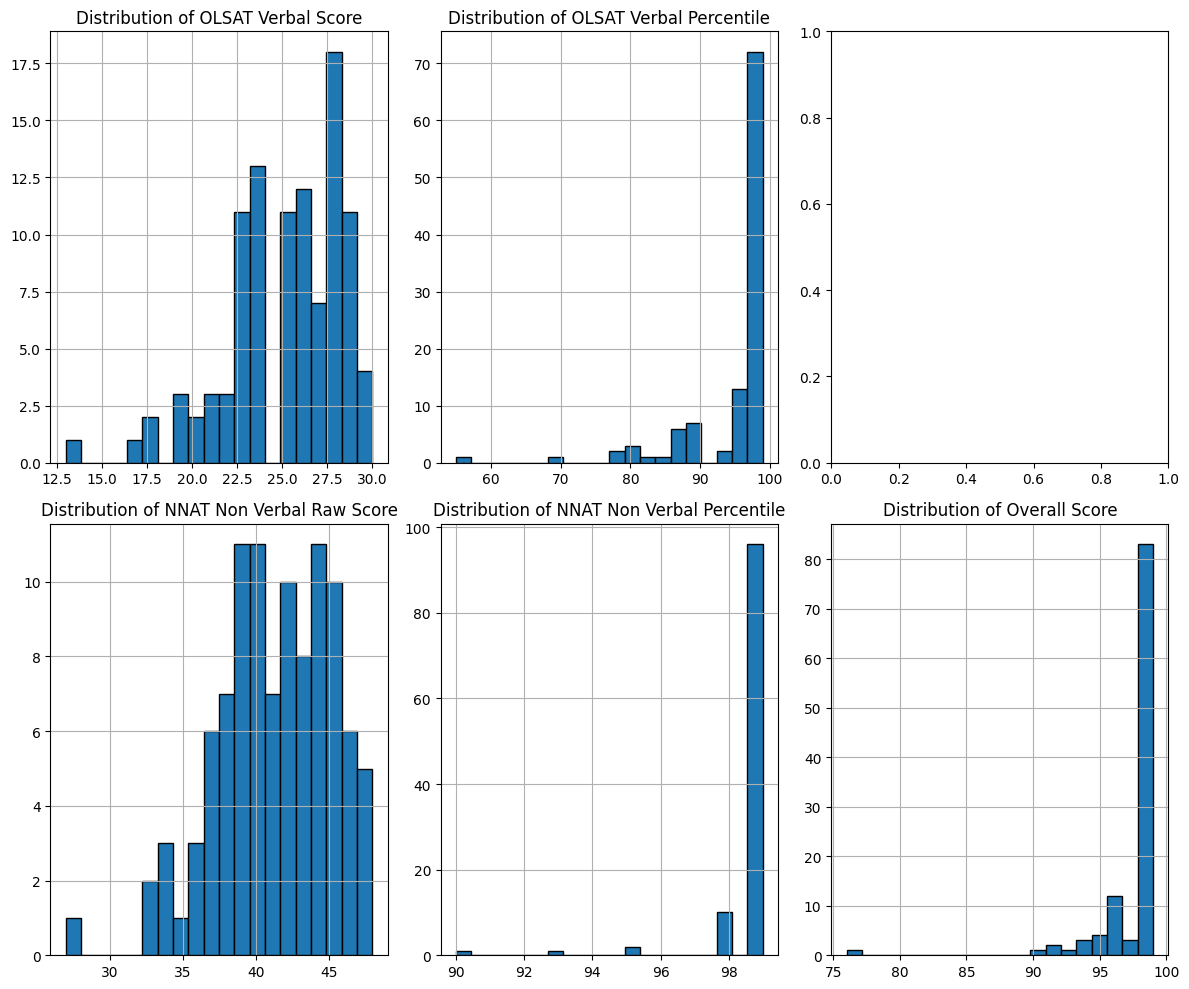

In [13]:
# Plot histograms to visualize distributions of numerical scores
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

df["OLSAT Verbal Score"].hist(ax=axes[0, 0], bins=20, edgecolor="black")
axes[0, 0].set_title("Distribution of OLSAT Verbal Score")

df["OLSAT Verbal Percentile"].hist(ax=axes[0, 1], bins=20, edgecolor="black")
axes[0, 1].set_title("Distribution of OLSAT Verbal Percentile")

df["NNAT Non Verbal Raw Score"].hist(ax=axes[1, 0], bins=20, edgecolor="black")
axes[1, 0].set_title("Distribution of NNAT Non Verbal Raw Score")

df["NNAT Non Verbal Percentile"].hist(ax=axes[1, 1], bins=20, edgecolor="black")
axes[1, 1].set_title("Distribution of NNAT Non Verbal Percentile")

df["Overall Score"].hist(ax=axes[1, 2], bins=20, edgecolor="black")
axes[1, 2].set_title("Distribution of Overall Score")

plt.tight_layout()
plt.show()

There seems to be one outlier

Now that we have an idea of what our data looks like. Lets convert some raw data into numeric data

In [14]:
# In Grade column lets convert 'K' to 0 and ensure all values are numeric
df["Grade Level"] = df["Grade Level"].replace({"K": 0})
df["Grade Level"] = pd.to_numeric(df["Grade Level"], errors='coerce')
# Print unique values to verify
print("Unique values in Grade Level after conversion:", df["Grade Level"].unique())

Unique values in Grade Level after conversion: [1 0 2 3]


In [15]:
# Define a mapping for month names to numerical values
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Convert the "Birth Month" column using the mapping
df["Birth Month"] = df["Birth Month"].map(month_mapping)

# Print unique values to verify
print("Unique values in Birth Month after conversion:", df["Birth Month"].unique())

Unique values in Birth Month after conversion: [ 9  8  3  4  5  2 10  6 12  7  1 11]


## Part B
### Let's explore by comparing correlations between various features
Key Questions
1.   Does a high OLSAT Verbal Score lead to a high Overall Score?
2.   Does Grade Level affect scores?
3.   Are there district-wide performance trends?
4.   Does Birth Month affect Overall Score?

Correlation Analysis Results:
                    OLSAT Verbal Score  Overall Score  Grade Level  District  \
OLSAT Verbal Score            1.000000       0.686811     0.492859 -0.216313   
Overall Score                 0.686811       1.000000     0.101927 -0.216429   
Grade Level                   0.492859       0.101927     1.000000 -0.239498   
District                     -0.216313      -0.216429    -0.239498  1.000000   
Birth Month                   0.005676       0.094177     0.060232 -0.093006   

                    Birth Month  
OLSAT Verbal Score     0.005676  
Overall Score          0.094177  
Grade Level            0.060232  
District              -0.093006  
Birth Month            1.000000  


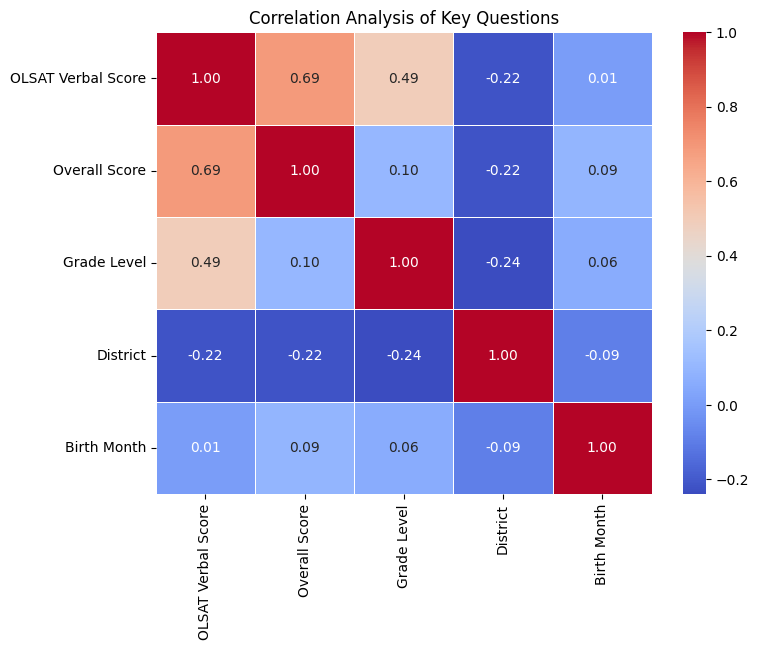

In [16]:
# Correlation Analysis
correlation_results = df[["OLSAT Verbal Score", "Overall Score",
                          "Grade Level", "District", "Birth Month"]].corr()
# Display correlation values
print("Correlation Analysis Results:")
print(correlation_results)

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_results, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis of Key Questions")
plt.show()

Based on the correlation analysis, two noticeable patterns emerge:

1. **OLSAT Verbal Score vs. Overall Score** (Correlation: 0.69)
A moderate to strong positive correlation (0.69) suggests that students who score higher on the OLSAT Verbal section tend to have a higher Overall Score.
This means that verbal ability contributes significantly to overall performance.
2.  **OLSAT Verbal Score vs. Grade Level** (Correlation: 0.49)
A moderate positive correlation (0.49) suggests that students in higher grade levels tend to have higher OLSAT Verbal Scores.

<ipython-input-17-c8ff418d7e23>:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  X_range = np.array(range(int(X.min()), int(X.max())+1)).reshape(-1, 1)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


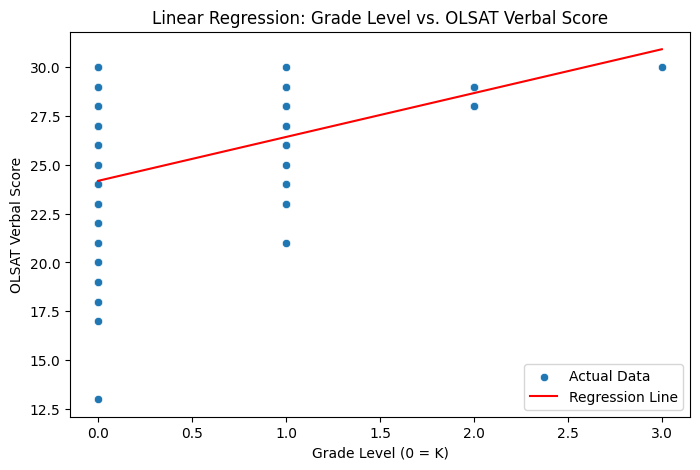

In [17]:
# An attempt to build a basic model

# Drop missing values
df.dropna(subset=["Grade Level", "OLSAT Verbal Score"], inplace=True)

# Prepare the data for regression
X = df[["Grade Level"]]
y = df["OLSAT Verbal Score"]

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for visualization
X_range = np.array(range(int(X.min()), int(X.max())+1)).reshape(-1, 1)
y_pred = model.predict(X_range)

# Visualize the data and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Grade Level"], y=df["OLSAT Verbal Score"], label="Actual Data")
plt.plot(X_range, y_pred, color='red', label="Regression Line")
plt.xlabel("Grade Level (0 = K)")
plt.ylabel("OLSAT Verbal Score")
plt.title("Linear Regression: Grade Level vs. OLSAT Verbal Score")
plt.legend()
plt.show()